<a href="https://colab.research.google.com/github/Rekkice/ADA-Informes/blob/main/Informe8_OptimalBST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Árbol binario de búsqueda óptimo
Entrada: Arreglo ordenado de claves, y arreglo que contenga la probabilidad de que cada clave sea buscada.

Salida: Árbol de búsqueda que minimiza la cantidad esperada de nodos visitados.

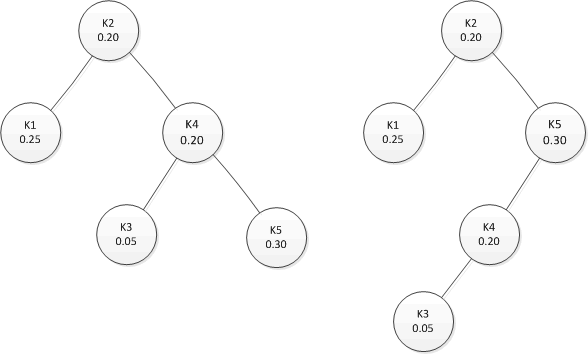

El problema de BST óptimo es un problema de optimización que busca reducir la cantidad de nodos que se deben visitar en un árbol binario de búsqueda para encontrar un elemento. Se puede optimizar de manera dinámica o estática, dependiendo de si se busca realizar rotaciones de árboles o sólo construir el árbol.

# 2.1 Descripción del algoritmo
## Construcción del árbol a partir de un arreglo
Para construir el árbol, primero se debe ordenar el arreglo. Luego, se selecciona un pivote para crear un nodo y se divide el arreglo en 2. El proceso se repite recursivamente para los subarreglos que se crean luego de la división.

## Recursivo
Para resolver el problema recursivamente, se define una función que calcule el costo recursivamente, comparando el costo para cada elemento si éste fuese raíz, y que retorna el costo mínimo.

## Bottom-up
Se itera sobre cada elemento del arreglo, considerando cada elemento como nodo raíz del árbol, construyendo árboles de la forma anteriormente mencionada. Luego, se selecciona el que tenga el costo mínimo considerando el costo de los subárboles que se generan.

# 2.2 Código

In [153]:
import networkx as nx

def costoRecursivo(arreglo, probab, llamadas = [0], T = None, verbose = False, visualize = False):
    llamadas[0] += 1
    if len(arreglo) == 0: return 0, None
    numLlamada = llamadas[0]
    #if not T and visualize: T = nx.binomial_tree(6)
    #else: T = nx.Graph(T)
    if len(arreglo) == 1: return probab[0], arreglo[0] # es un nodo hoja

    if verbose: print(f"Se llama costoRecursivo() por {numLlamada}° vez")
    suma = sum(probab) # probabilidad de visitar el nodo + probabilidad de buscar la clave de sus hijos
    if verbose: print(f"La probabilidad de visitar el nodo o buscar uno de sus hijos es {suma}")
    costoMin = -1
    for raiz in range(len(arreglo)): # el costo es la suma de los costos de los subárboles más la sumatoria de probabilidades
        costoL, raizL = costoRecursivo(arreglo[:raiz], probab[:raiz], llamadas, T, verbose) # sólo la primera llamada tiene visualize == True
        costoR, raizR = costoRecursivo(arreglo[raiz+1:], probab[raiz+1:], llamadas, T, verbose)
        costo = costoL + costoR + suma

        if costo < costoMin or costoMin == -1:
            costoMin = costo
            raizMin = arreglo[raiz]
            if visualize:
                if raizL: # si no es None
                    if isinstance(raizL, int): T.add_edge(raizMin, raizL) # si es un int, se agrega el único nodo al nodo raíz
                    else: T.add_edges_from(raizL.edges())                 # es un árbol, se agregan los nodos al nodo raíz
                if raizR:
                    if isinstance(raizR, int): T.add_edge(raizMin, raizR)
                    else: T.add_edges_from(raizR.edges())
    # if visualize: nx.draw(T, with_labels=True)     | no funciona
    if verbose: print(); print(f"El costo mínimo de la llamada {numLlamada}° es {costoMin}")
    return costoMin, T

In [144]:
from networkx.drawing.nx_pydot import graphviz_layout

def costoBottomUp(arreglo, probab, verbose = False, visualize = False):
    costo = [[-1 for i in range(len(arreglo))] for j in range(len(arreglo))]
    raices = [[-1 for i in range(len(arreglo))] for j in range(len(arreglo))]
    for i in range(len(arreglo)):
        costo[i][i] = probab[i]   # el costo un árbol de un sólo elemento (i = j) es sólo la probabilidad de ese elemento
        raices[i][i] = i

    for diag in range(len(arreglo), 0, -1): # largo de diagonal
        if verbose: print(f"Se recorre diagonal de largo {diag}")
        for i in range(diag):
            j = i + len(arreglo) - diag + 1
            if j >= len(arreglo): break
            suma = sum(probab[i:j+1]) # sumatoria de probabilidades de elementos i a j
            if verbose: print(f"Se calcula el costo mínimo del árbol con los elementos {arreglo[i:j+1]}")

            for raiz in range(i, j + 1):
                costoAux = suma + (costo[i][raiz - 1] if raiz > i else 0) + (costo[raiz + 1][j] if raiz < j else 0)
                if costoAux < costo[i][j] or costo[i][j] == -1: # costoAux = costo de cada subárbol + sumatoria de probabilidades
                    costo[i][j] = costoAux
                    raices[i][j] = raiz
            if verbose: print(f"El costo mínimo es {costo[i][j]}"); print();
    if verbose:
        print(f"Matriz de subproblemas:")
        for fila in costo:
            print(fila)
        print(f"Matriz de raices:")
        for fila in raices:
            print(fila)
    if visualize:
        arbol = construirArbol(arreglo, raices)
        nx.draw(arbol, graphviz_layout(arbol, prog="dot"), with_labels=True)
    return costo[0][len(arreglo)-1]

def construirArbol(arreglo, raices, raiz = -1, i = 0, j = 0, arbol = nx.Graph()):
    if raiz == -1: 
        raiz = raices[0][len(arreglo) - 1]
        i = 0; j = len(arreglo) - 1
    if raiz > i:
        nodo = arreglo[raices[i][raiz - 1]]
        arbol.add_edge(arreglo[raiz], nodo)
        construirArbol(arreglo, raices, raices[i][raiz - 1], i, raiz - 1, arbol)
    if raiz < j:
        nodo = arreglo[raices[raiz + 1][j]]
        arbol.add_edge(arreglo[raiz], nodo)
        construirArbol(arreglo, raices, raices[raiz + 1][j], raiz + 1, j, arbol)
    return arbol

# 2.3 Ejecución paso a paso

In [145]:
arreglo = [1, 2, 3, 4, 5]
probab = [5, 1, 7, 4, 9]
costoRecursivo(arreglo, probab, [0], None, True)[0]

Se llama costoRecursivo() por 1° vez
La probabilidad de visitar el nodo o buscar uno de sus hijos es 26
Se llama costoRecursivo() por 3° vez
La probabilidad de visitar el nodo o buscar uno de sus hijos es 21
Se llama costoRecursivo() por 5° vez
La probabilidad de visitar el nodo o buscar uno de sus hijos es 20
Se llama costoRecursivo() por 7° vez
La probabilidad de visitar el nodo o buscar uno de sus hijos es 13

El costo mínimo de la llamada 7° es 17
Se llama costoRecursivo() por 14° vez
La probabilidad de visitar el nodo o buscar uno de sus hijos es 11

El costo mínimo de la llamada 14° es 15

El costo mínimo de la llamada 5° es 35
Se llama costoRecursivo() por 21° vez
La probabilidad de visitar el nodo o buscar uno de sus hijos es 13

El costo mínimo de la llamada 21° es 17
Se llama costoRecursivo() por 26° vez
La probabilidad de visitar el nodo o buscar uno de sus hijos es 8

El costo mínimo de la llamada 26° es 9
Se llama costoRecursivo() por 32° vez
La probabilidad de visitar el 

50

Se recorre diagonal de largo 5
Se calcula el costo mínimo del árbol con los elementos [1, 2]
El costo mínimo es 7

Se calcula el costo mínimo del árbol con los elementos [2, 3]
El costo mínimo es 9

Se calcula el costo mínimo del árbol con los elementos [3, 4]
El costo mínimo es 15

Se calcula el costo mínimo del árbol con los elementos [4, 5]
El costo mínimo es 17

Se recorre diagonal de largo 4
Se calcula el costo mínimo del árbol con los elementos [1, 2, 3]
El costo mínimo es 20

Se calcula el costo mínimo del árbol con los elementos [2, 3, 4]
El costo mínimo es 17

Se calcula el costo mínimo del árbol con los elementos [3, 4, 5]
El costo mínimo es 35

Se recorre diagonal de largo 3
Se calcula el costo mínimo del árbol con los elementos [1, 2, 3, 4]
El costo mínimo es 28

Se calcula el costo mínimo del árbol con los elementos [2, 3, 4, 5]
El costo mínimo es 38

Se recorre diagonal de largo 2
Se calcula el costo mínimo del árbol con los elementos [1, 2, 3, 4, 5]
El costo mínimo es 50

50

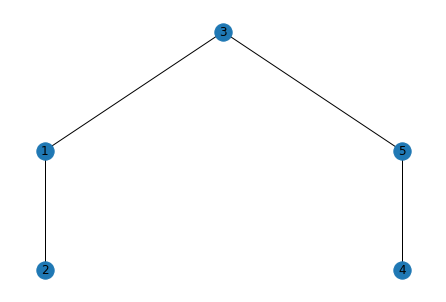

In [146]:
costoBottomUp(arreglo, probab, True, True)

#3. Tiempo de ejecucción

### Optimal BST recursivo

Al ser una implementación recursiva muy probablemente se resuelvan los mismos subproblemas que se encuentren dentro de los ${2n\choose n}\frac{1}{n+1}$ posibles árboles que pueden resultar. Esto resulta en la complejidad de la versión recursiva en $O(2^n)$. La complejidad espacial de esta versión es de $O(1)$, puesto que no es necesario utilizar estructuras auxiliares para almacenar los datos.

### Optimal BST dinámico

La versión dinámica no sufre de los problemas de su contraparte recursiva, puesto que guarda en la memoria los valores que ya ha calculado, por lo que resuelve los subproblemas una única vez. Debido a que el algoritmo necesita tener tres ciclos anidados $for$ que van hasta $n$, lo que nos da un tiempo de ejecucción de $O(n^3)$, el tiempo de ejecucción no influye puesto que estos tienen una complejidad de $O(n)$. Existe una forma de reducir el tiempo de ejecucción de esta versión a un $O(n^2)$, el cuál requiere de utilizar el "Teorema de Knuth", el cuál restringe valores para que no se tengan que realizar iteraciones innecesarias. La complejidad espacial de esta versión puesto que utiliza una matriz auxiliar para ir almacenando los resultados de los subproblemas ya calculados nos da $O(n^2)$.

# 4. Correctitud
El problema se puede modelar como una serie de subproblemas que se pueden resolver de manera independiente, que luego formarán parte de la solución al problema original.

El costo de un árbol es igual al costo de sus subárboles más la probabilidad de visitar el nodo raíz. Considerando esto, se puede decir que es posible encontrar el costo mínimo de un árbol calculando el costo de cada subárbol por separado y luego sumándole la probabilidad.

El costo mínimo estaría dado por la siguiente función:

Costo de i a j = costo de subárbol 1 + costo de subárbol 2 + $\sum\limits_{}$
$Costo_{i,j} = subárbol 1 + subárbol 2 + \sum\limits_{k=1}^j$ $probabilidad$ $de$ $j$

## Teorema

El algoritmo recibe un rango $i,j$ y encuentra el costo mínimo posible para un árbol binario formado por los elementos dentro de ese rango.

## Prueba del teorema

En cada iteración se calcula el costo mínimo de un arbol con $j - i$ elementos y se guarda en una matriz con la solución de los subproblemas. Probaremos la siguiente propiedad invariante:
> Al comienzo de cada iteración, la solución de los subárboles ya se encuentra en la matriz. 

Sólo es necesario sumar las soluciones y la probabilidad de visitar el nodo raíz.

## Inicialización

Al comienzo de la primera iteración, donde $i = 0$ y $j = 1$, el subproblema será el nodo en la posición $i$ o $j$ del arreglo. Como sólo es un nodo hoja, la solución se encuentra en la diagonal de la matriz, y es igual a la probabilidad de que la clave sea buscada. Por lo tanto, se cumple la propiedad.

## Mantención

Aplicando inducción, asumimos que al comienzo de cada iteración se cumple la propiedad.

Durante la iteración, se busca el costo mínimo de un subárbol comparando el costo de cada nodo si éste fuese raíz.

Al terminar la iteración, el valor en la posición [i][j] de la matriz corresponde a la solución del rango de elementos $i,j$ y se sigue cumpliendo la propiedad invariante.

El problema original corresponde al caso donde $i = 0$ y $j =$ *largo del arreglo inicial*, es decir, cuando el rango incluye todos los elementos del arreglo.
Por lo tanto, si se resuelven los subproblemas, el problema original también quedaría resuelto.

# 5. Experimentos

## 5.1 Tiempo de ejecución
En este experimento se compara el tiempo de ejecución de la implementación recursiva y bottom-up.

In [147]:
#@title Generador de instancias
import random
import numpy as np

def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = arr[n:] # Probabilidad de las claves ficticias
    return keys, p, q
    
keys, p, q = optimal_bst_instance_generator(10)

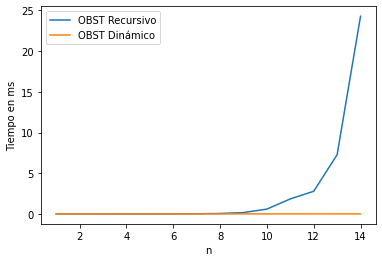

In [168]:
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(1, 15):
  claves,frec,m = optimal_bst_instance_generator(n)

  t1 = repeat(setup="from __main__ import costoRecursivo", stmt=f"costoRecursivo({claves},{frec})", repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import costoBottomUp", stmt=f"costoBottomUp({claves},{frec})", repeat = 1, number = 10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["OBST Recursivo", "OBST Dinámico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

## Análisis
Se puede observar que el tiempo del OBST recursivo empieza a aumentar considerablemente en comparación al dinámico cuando la cantidad de elementos es mayor a 10. Esto se debe a que el OBST recursivo tiene una complejidad temporal de $O(2^n)$, por lo que crece más rápido que el OBST dinámico que tiene una complejidad temporal de $O(n^3)$.

## 5.2 Elemento con mayor probabilidad en la raíz
En este experimento se compara el tiempo y el costo mínimo en una versión modificada del algoritmo bottom-up donde el elemento con mayor probabilidad siempre queda en la raíz.

In [173]:
#@title Bottom-up modificado
def costoBottomUp2(arreglo, probab):
    costo = [[-1 for i in range(len(arreglo))] for j in range(len(arreglo))]
    for i in range(len(arreglo)):
        costo[i][i] = probab[i]

    for diag in range(len(arreglo), 0, -1): # largo de diagonal
        for i in range(diag):
            j = i + len(arreglo) - diag + 1
            if j >= len(arreglo): break
            suma = sum(probab[i:j+1]) # sumatoria de probabilidades de elementos i a j

            if i == 0 and j == len(arreglo) - 1:
                raiz = probab.index(max(probab)) # indice del elemento con mayor probabilidad
                costo[0][len(arreglo)-1] = suma + (costo[i][raiz - 1] if raiz > i else 0) + (costo[raiz + 1][j] if raiz < j else 0)
                return costo[0][len(arreglo)-1]
            else:
                for raiz in range(i, j + 1):
                    costoAux = suma + (costo[i][raiz - 1] if raiz > i else 0) + (costo[raiz + 1][j] if raiz < j else 0)
                    if costoAux < costo[i][j] or costo[i][j] == -1: # costoAux = costo de cada subárbol + sumatoria de probabilidades
                        costo[i][j] = costoAux

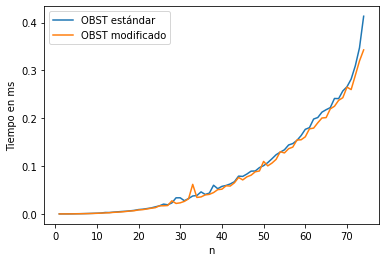

In [183]:
#@title Código gráfica
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(1, 75):
  claves,frec,m = optimal_bst_instance_generator(n)

  t1 = repeat(setup="from __main__ import costoBottomUp", stmt=f"costoBottomUp({claves},{frec})", repeat = 1, number = 10)
  t2 = repeat(setup="from __main__ import costoBottomUp2", stmt=f"costoBottomUp2({claves},{frec})", repeat = 1, number = 10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["OBST estándar", "OBST modificado"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

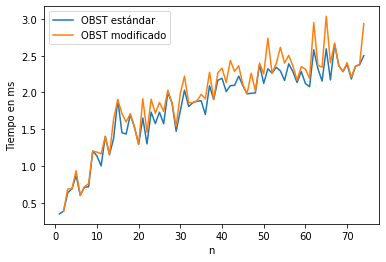

In [182]:
#@title Código gráfica
import matplotlib.pyplot as plt
import random
from timeit import repeat

x = []
y1 = []
y2 = []

for n in range(1, 75):
  claves,frec,m = optimal_bst_instance_generator(n)

#   t1 = repeat(setup="from __main__ import costoBottomUp", stmt=f"costoBottomUp({claves},{frec})", repeat = 1, number = 10)
#   t2 = repeat(setup="from __main__ import costoBottomUp2", stmt=f"costoBottomUp2({claves},{frec})", repeat = 1, number = 10)

  x.append(n)
  y1.append(costoBottomUp(claves, frec))
  y2.append(costoBottomUp2(claves, frec))

plt.plot(x,y1)
plt.plot(x,y2)

plt.legend(["OBST estándar", "OBST modificado"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

## Análisis
Se puede observar que el OBST modificado es más rápido, pero el costo mínimo retornado es mayor. La diferencia de tiempo aumenta a medida que *n* crece. Usar la versión modificada podría valer la pena en casos donde *n* es grande y el costo de construir un árbol binario sea mayor al tiempo de búsqueda extra que tiene este cambio como consecuencia.